In [1]:
import pandas as pd
import os
import re
import numpy as np
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('AGGREGATED_DATA_mobile_developer_berlin.csv')

In [4]:
df.shape

(3737, 16)

In [5]:
df.isna().sum()

Unnamed: 0                                  0
company_name                                0
position                                    0
location                                    0
url                                         0
date_posted                                 0
Number of applicants                      430
full-time/part-time                      2690
seniority level                          3028
employees                                  98
descriptions                                0
industry                                  262
top competitive skills                      0
Hiring Trend Company Wide                3173
Hiring Trend Company Wide-Engineering    3180
Median Tenure                            3173
dtype: int64

In [6]:
df['seniority level'].value_counts()

associate    709
Name: seniority level, dtype: int64

In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df.columns

Index(['company_name', 'position', 'location', 'url', 'date_posted',
       'Number of applicants', 'full-time/part-time', 'seniority level',
       'employees', 'descriptions', 'industry', 'top competitive skills',
       'Hiring Trend Company Wide', 'Hiring Trend Company Wide-Engineering',
       'Median Tenure'],
      dtype='object')

In [9]:
pd.DataFrame(df['position'].value_counts()).reset_index()

,index,position
0,software development engineer,116
1,android developer,44
2,senior android developer,35
3,software engineer,31
4,senior android engineer,31
5,senior ios developer,27
6,senior ios engineer,26
7,lead mobile developer ios android,21
8,ios engineer f m d,21
9,android engineer,20


In [10]:
df['position'] = df['position'].apply(lambda x: x.lower())
df['descriptions'] = df['descriptions'].apply(lambda x: x.lower())

In [11]:
def filter_df(x, y):
    if ('mobile' in x) or ('android' in x) or ('ios' in x) or ('swift' in x) or ('kotlin' in x) :
        return "keep"
    else:
        if ('android' in y) or ('ios' in y) or ('mobile' in y) or ('swift' in y) or ('kotlin' in y):
            return 'keep'
        else:
            return 'remove'     
df['new_filter'] = list(map(filter_df, df['position'], df['descriptions']))

In [12]:
remove = df[df['new_filter']=='remove'].reset_index(drop=True)

In [13]:
df = df[df['new_filter']=='keep'].reset_index(drop=True)
df = df.drop(['new_filter'], axis=1)

In [14]:
df.shape

(2605, 15)

# Total Job Postings by Time Frames

In [15]:
def dates_posted_to_time_frames(x):
    if ('hour' in x) or ('minute' in x):
        return 'within 1 week'
    try:
        num = int(re.findall('\d+', x)[0])
    except TypeError:
        return np.NaN
    if 'week' in x:
        if num == 1:
            return 'within 1 week'
        elif num == 2:
            return 'Between 1 and 2 weeks'
        elif num == 3:
            return 'Between 2 and 3 weeks'
        else:
            return "More than 3 weeks" 
    else:
        return "More than 3 weeks"        
df['time_frames'] = list(map(dates_posted_to_time_frames, df['date_posted']))
# df['time_frames'].value_counts()

In [16]:
temp = pd.DataFrame(df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,1175
1,within 1 week,795
2,Between 1 and 2 weeks,355
3,Between 2 and 3 weeks,280


In [17]:
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]

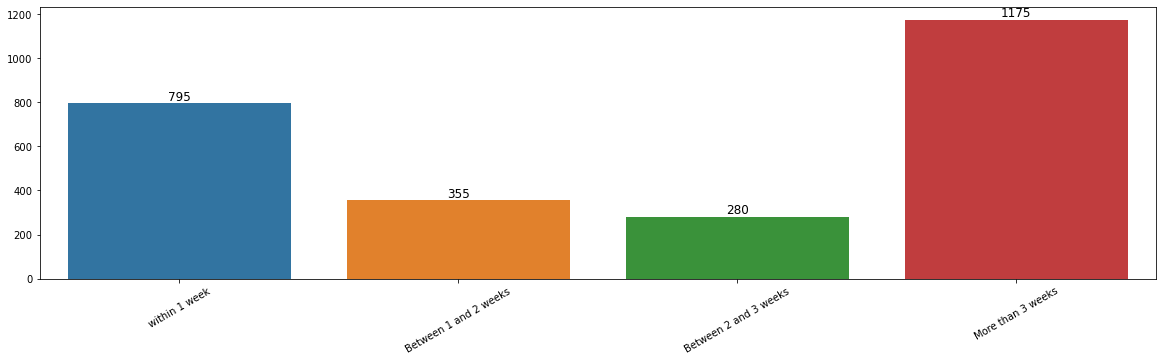

In [18]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [19]:
df_within_1_week = df[df['time_frames'] == 'within 1 week']

In [20]:
df_within_1_month = df[(df['time_frames'].isin(['within 1 week', 'Between 1 and 2 weeks', 'Between 2 and 3 weeks'])) |
                       (df['date_posted'] == '1 month ago')]

# Seniority Level Segments

associate/senior      1437
junior/entry level    1168
Name: seniority_segment_created, dtype: int64
            Seniority  number of postings
0    associate/senior                1437
1  junior/entry level                1168


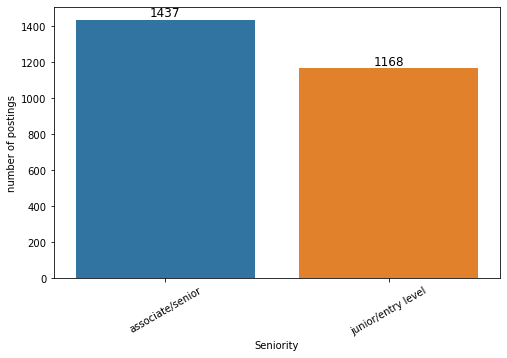

In [21]:
def segment_seniority_levels(x, y):
    if pd.isna(y):
        if ('senior' in x) or ('lead' in x) or ('sr ' in x) or ('director' in x) or ('manager' in x):
            return 'associate/senior'
        else:
            return 'junior/entry level'
    elif y == 'associate':
        return 'associate/senior'
df['seniority_segment_created'] = list(map(segment_seniority_levels, df['position'],df['seniority level']))
print(df['seniority_segment_created'].value_counts())

temp = pd.DataFrame(df['seniority_segment_created'].value_counts()).reset_index()
temp.columns =['Seniority', 'number of postings']
print(temp)

fig, ax = plt.subplots(figsize= (8,5))
ax = sns.barplot(x="Seniority", y="number of postings", data=temp)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [22]:
junior_level_df = df[df['seniority_segment_created']=='junior/entry level']
print(junior_level_df.shape)
senior_level_df = df[df['seniority_segment_created']=='associate/senior']
print(senior_level_df.shape)

(1168, 17)
(1437, 17)


# Junior Level job postings by Time Frames 

In [23]:
temp = pd.DataFrame(junior_level_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,521
1,within 1 week,321
2,Between 1 and 2 weeks,184
3,Between 2 and 3 weeks,142


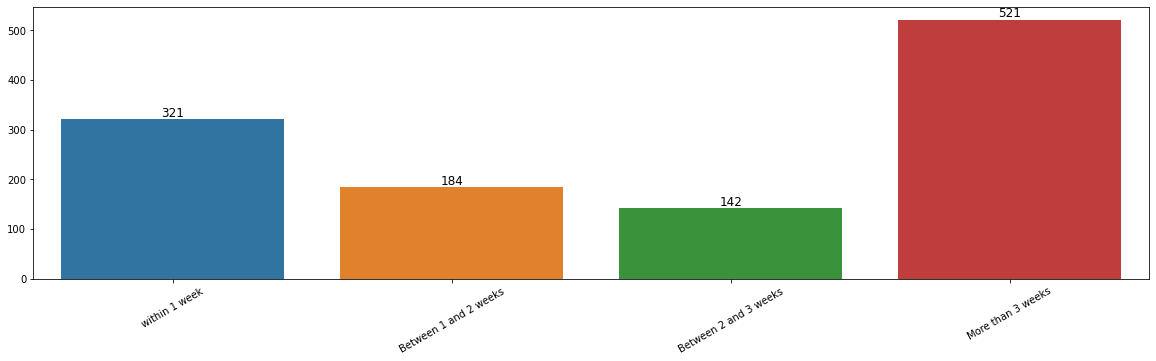

In [24]:
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Companies Hiring

In [25]:
temp = pd.DataFrame(df['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
temp.head(30)

,company_name,number of postings
0,zalando,189
1,amazon,175
2,picsart,84
3,delivery hero,74
4,cariad,57
5,mobile.de gmbh,40
6,sumup,37
7,agoda,35
8,n26,33
9,client server,33


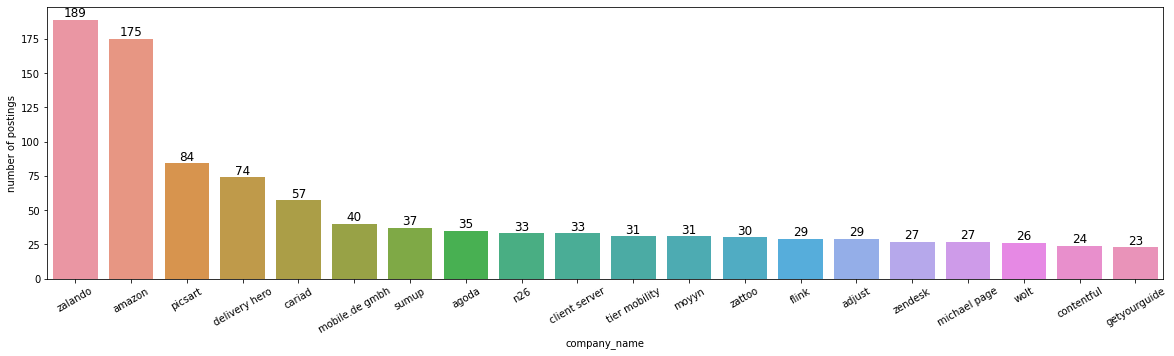

In [26]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# top companies hiring within 1 week

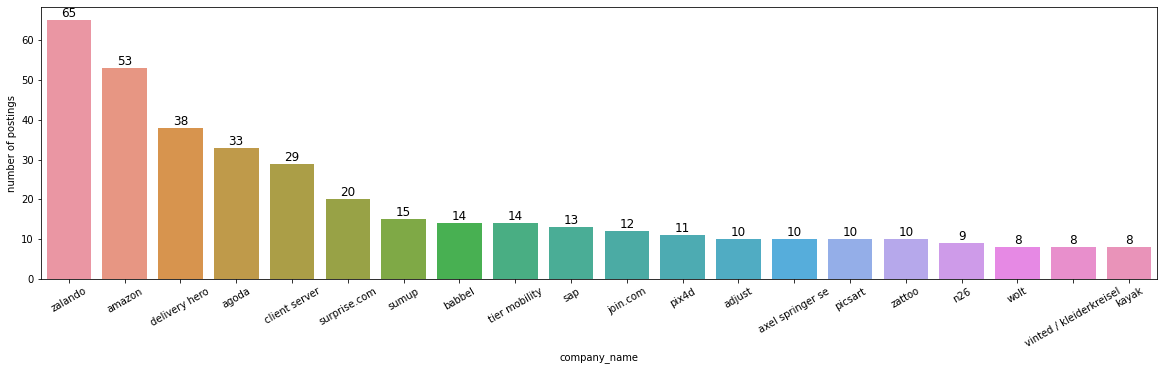

In [27]:
temp = pd.DataFrame(df_within_1_week['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# top companies hiring within 1 month

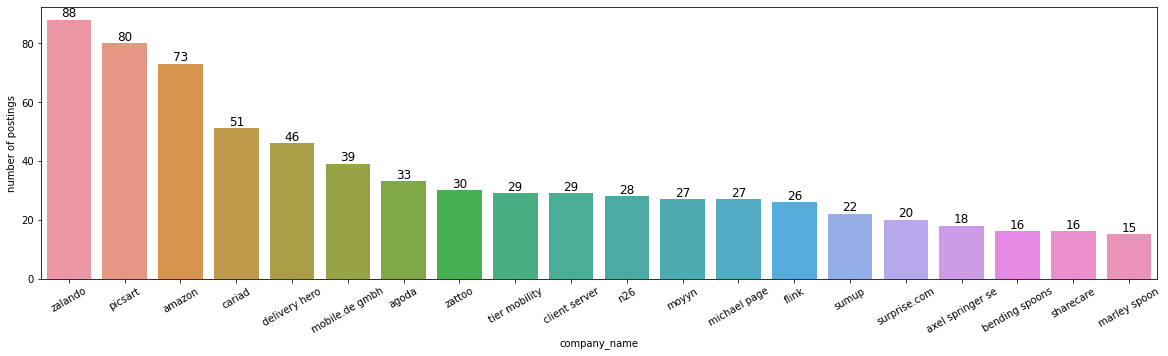

In [28]:
temp = pd.DataFrame(df_within_1_month['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Companies hiring only for junior positions

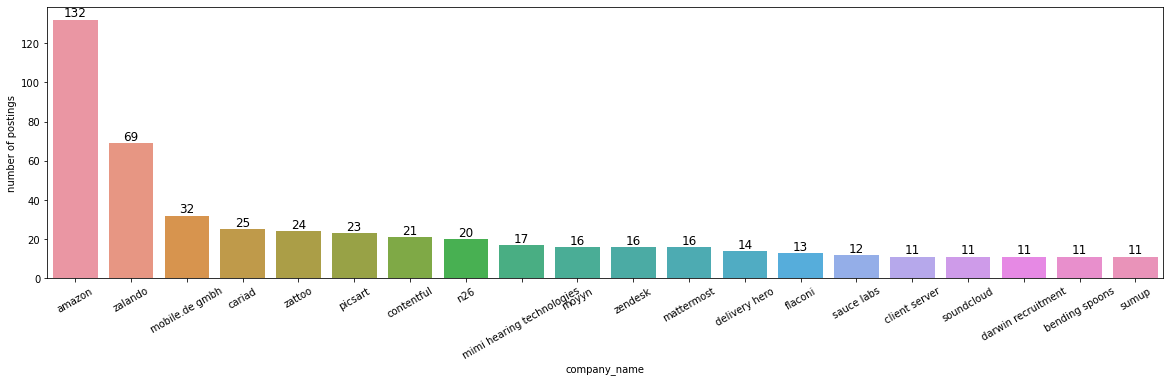

In [29]:
temp = pd.DataFrame(junior_level_df['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions Overall

In [30]:
top_positions = pd.DataFrame(df['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
top_positions

,position,count
0,android developer,44
1,software development engineer,40
2,senior android developer,35
3,senior android engineer,31
4,senior ios developer,27
5,senior ios engineer,26
6,lead mobile developer ios android,21
7,ios engineer f m d,21
8,android engineer,20
9,senior ios developer m f d,18


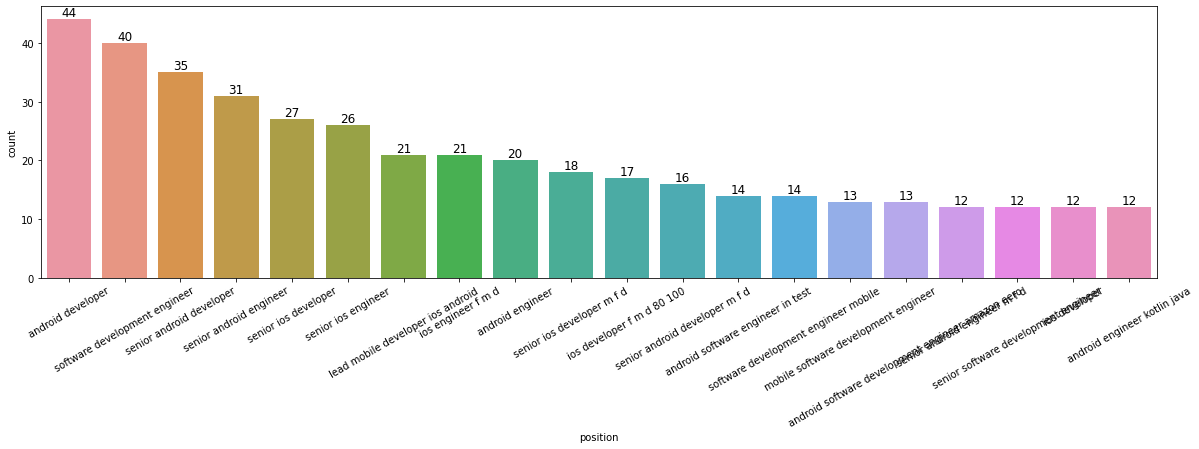

In [31]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions this week

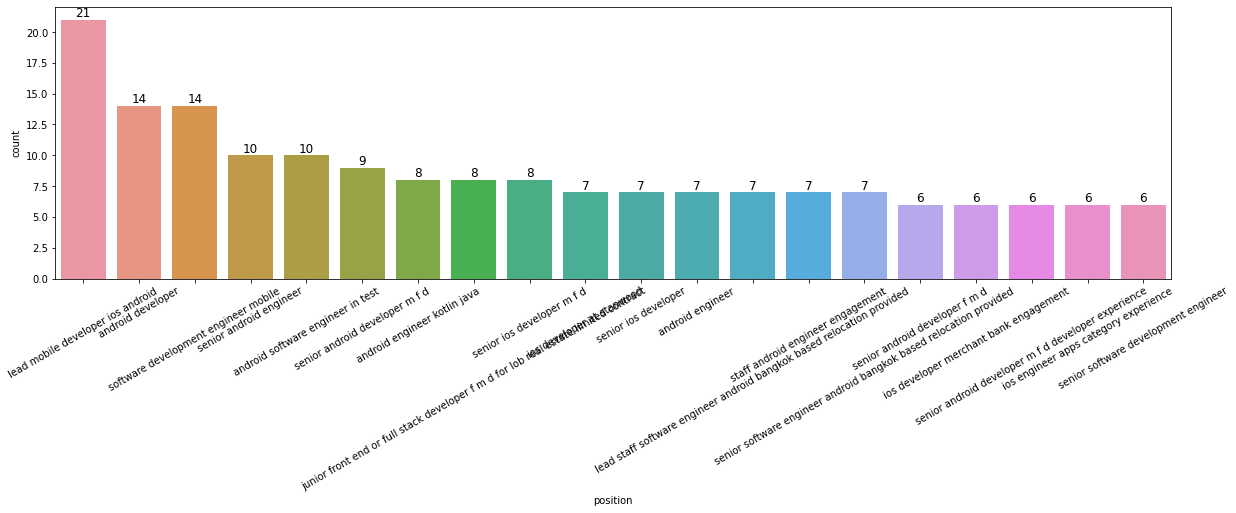

In [32]:
top_positions = pd.DataFrame(df_within_1_week['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions This Month

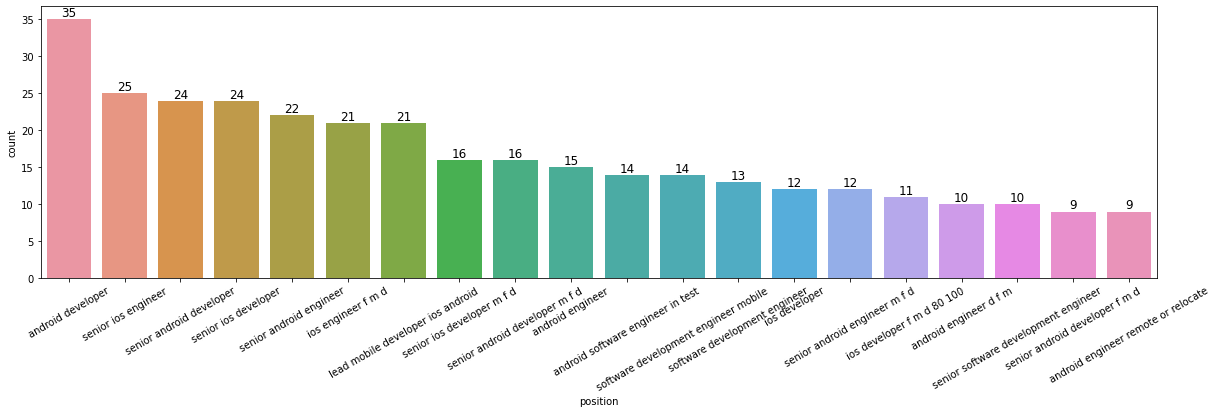

In [33]:
top_positions = pd.DataFrame(df_within_1_month['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions For Junior/Entry Level Roles

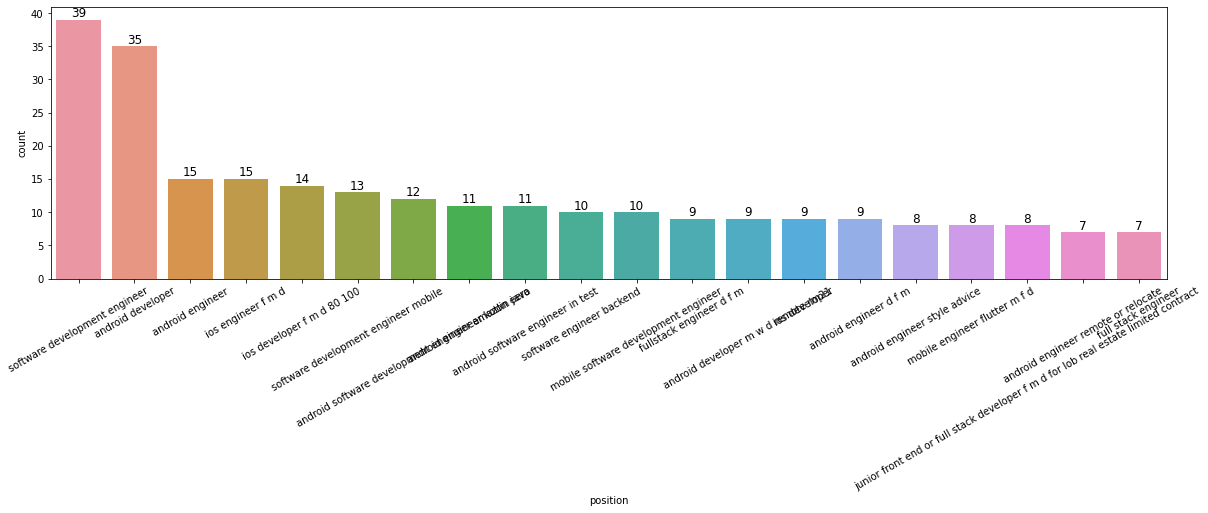

In [34]:
top_positions = pd.DataFrame(junior_level_df['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [35]:
top_skills = []
for row_content in df['top competitive skills']:
    row_content = row_content.replace('/', ' ').replace('-', ' ')
    if len(row_content) > 3:
        try:
            for item in re.findall('\w+ \w+ \w+', row_content):  # Skills with 3 words
                top_skills.append(item)
            for item in re.findall('\w+ \w+', row_content):  # Skills with 2 words
                top_skills.append(item)
            for item in re.findall('\'\w+\'', row_content):  # Skill with single word
                top_skills.append(re.findall('\w+', item)[0])
        except TypeError:
            pass

top_skills = [item.lower() for item in top_skills]

In [36]:
# len(top_skills)
# ios_skill = []
# for item in top_skills:
#     if 'ios' in item:
#         ios_skill.append(item)
# ios_skill

In [37]:
def clean_skill(x):
    if ('cascading' in x) or ('css' in x):
        return 'css'
    elif 'ios' in x:
        return 'ios'
    elif 'android' in x:
        return 'android'
    elif 'sql' in x:
        return'sql'
    elif 'object oriented' in x:
        return 'object oriented programing'
    elif 'back end' in x:
        return 'back end'
    elif 'front end' in x:
        return 'front end'
    elif ('full stack' in x) or ('fullstack' in x):
        return 'full stack'
    elif 'user interface' in x:
        return 'user interface design'
    elif 'php' in x:
        return 'php'
    elif 'model view' in x:
        return 'model view'
    elif 'programming' in x:
        return 'programming language'
    elif 'azure' in x:
        return 'azure'
    elif 'web design' in x:
        return 'web design'
    elif ('software project' in x) or ('project management' in x):
        return 'project management'
    elif 'java database' in x:
        return 'java database'
    elif 'sap' in x:
        return 'sap'
    elif 'apis' in x:
        return 'apis'
    else:
        return x  

In [38]:
top_skills = pd.Series(top_skills).apply(clean_skill)

# Top Skills of the candidates who applied for the job

In [39]:
x = pd.DataFrame(pd.DataFrame(top_skills).value_counts())
x.columns = ['count']
x = x.reset_index()
x.columns = ['skill', 'count']
x = x[x['count']> 7]
x

,skill,count
0,sql,1524
1,android,1070
2,javascript,762
3,css,740
4,programming language,729
5,model view,534
6,object oriented programing,522
7,java,500
8,ios,491
9,git,375


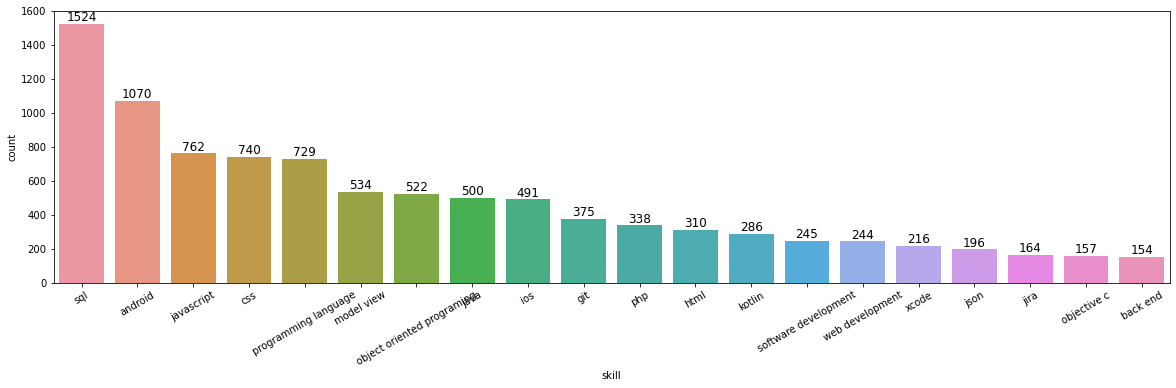

In [40]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=x.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [41]:
skills = x['skill']
skills = list(skills.values)

In [42]:
other_skills = ['swift', 'xamarin', 'appcelerator', 'cordova', 'phonegap', 'buildfire', 'ionic', 'android sdk', 
               'android studio', 'angular', 'objective-c', 'dart', 'lua', 'rust' ,'action script' ,
               'mobile design']

In [43]:
skills = skills + other_skills

# Top Skills Asked by the employers

In [44]:
import re

In [45]:
skills_count = {}
for skill in skills:
    counter = 0
    for description in df['descriptions']:
        if (skill == 'ci') and len(re.findall('ci ', description))>0:
            counter+=1
        elif skill in description:
            counter += 1
    skills_count[skill] = counter

In [46]:
skills_count = pd.DataFrame(dict(sorted(skills_count.items(), key=lambda x: x[1], reverse=True)).items())
skills_count.columns = ['skill', 'count']

In [47]:
skills_count

,skill,count
0,unity,1501
1,ios,1422
2,android,1383
3,git,1325
4,engineering,1318
5,english,1277
6,java,1235
7,testing,1230
8,a b,1195
9,communication,1167


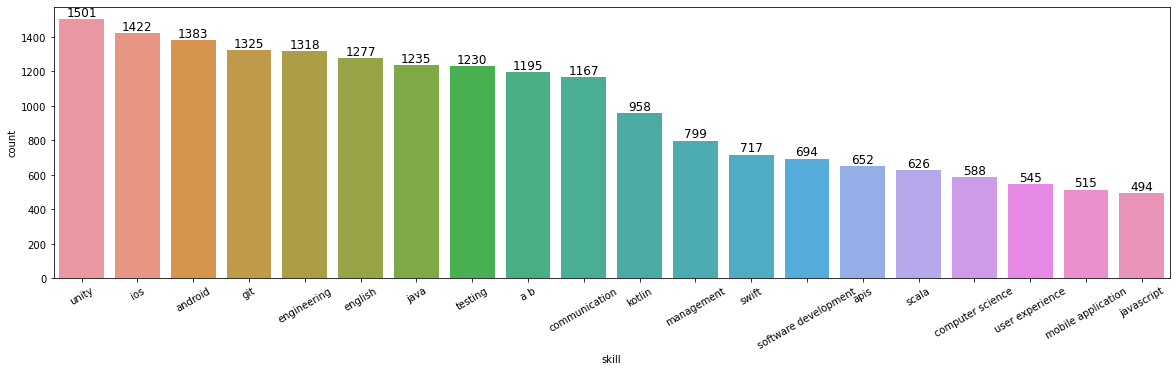

In [48]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Skills Required by Employers for Junior/Entry Level Positions 

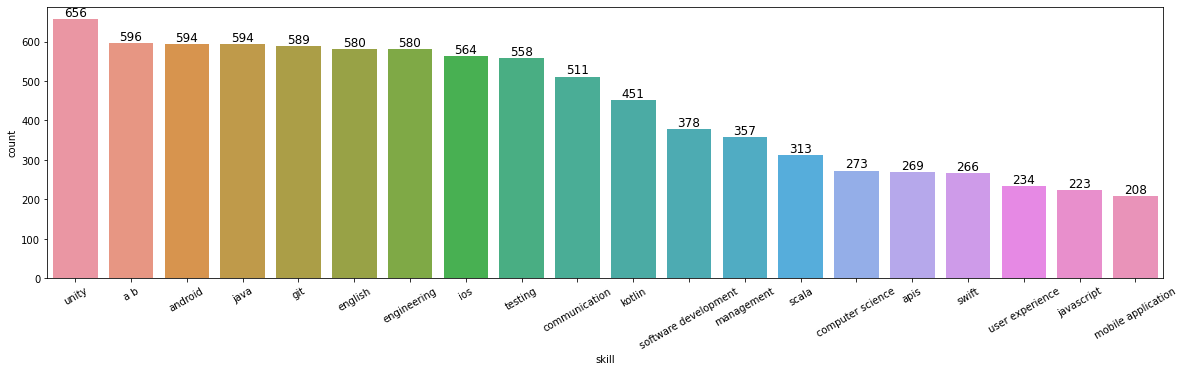

In [49]:
skills_count = {}
for skill in skills:
    counter = 0
    for description in junior_level_df['descriptions']:
        if (skill == 'ci') and len(re.findall('ci ', description))>0:
            counter+=1
        elif skill in description:
            counter += 1
    skills_count[skill] = counter
skills_count = pd.DataFrame(dict(sorted(skills_count.items(), key=lambda x: x[1], reverse=True)).items())
skills_count.columns = ['skill', 'count']
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [50]:
## Next analysis : Top skills for iOS jobs and for Android Jobs 

In [51]:
df['position'].value_counts()

android developer                                                                                                 44
software development engineer                                                                                     40
senior android developer                                                                                          35
senior android engineer                                                                                           31
senior ios developer                                                                                              27
senior ios engineer                                                                                               26
lead mobile developer ios android                                                                                 21
ios engineer f m d                                                                                                21
android engineer                                                

In [52]:
def platform_ios_android(x, y):
    if 'android' in x:
        return "android"
    elif 'kotlin' in x:
        return "android"
    elif 'ios' in x:
        return 'ios'
    elif 'swift' in x:
        return 'ios'
    elif ('android' in y) and ('ios' not in y):
        return 'android'
    elif ('ios' in y) and ('android' not in y):
        return 'ios'
    elif ('swift' in y) and ('kotlin' not in y) and ('android' not in y):
        return 'ios'
    elif ('kotlin' in y) and ('swift' not in y) and ('ios' not in y):
        return 'android'
    else:
        return 'not specified'     
df['platform'] = list(map(platform_ios_android, df['position'], df['descriptions']))

In [53]:
df['platform'].value_counts()

not specified    1041
android           907
ios               657
Name: platform, dtype: int64

# iOS Analysis

In [54]:
ios_df = df[df['platform']=='ios']
ios_df.shape

(657, 18)

In [55]:
# ios_df.head()

In [56]:
ios_junior_df = df[(df['platform']=='ios') & (df['seniority_segment_created']=='junior/entry level')]
ios_junior_df.shape

(241, 18)

In [57]:
# ios_junior_df.head()

# IOS JOBS BY TIMEFRAMES

In [58]:
temp = pd.DataFrame(ios_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,291
1,within 1 week,194
2,Between 1 and 2 weeks,91
3,Between 2 and 3 weeks,81


In [59]:
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]

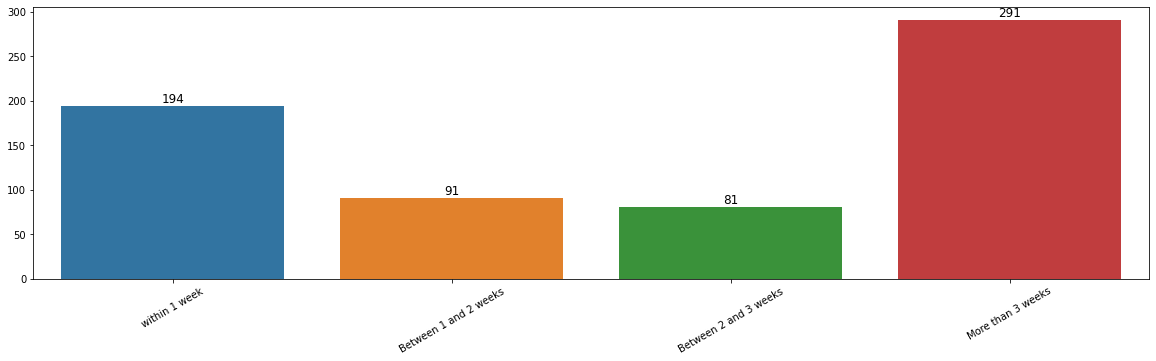

In [60]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# JUNIOR LEVEL IOS JOBS BY TIMEFRAMES

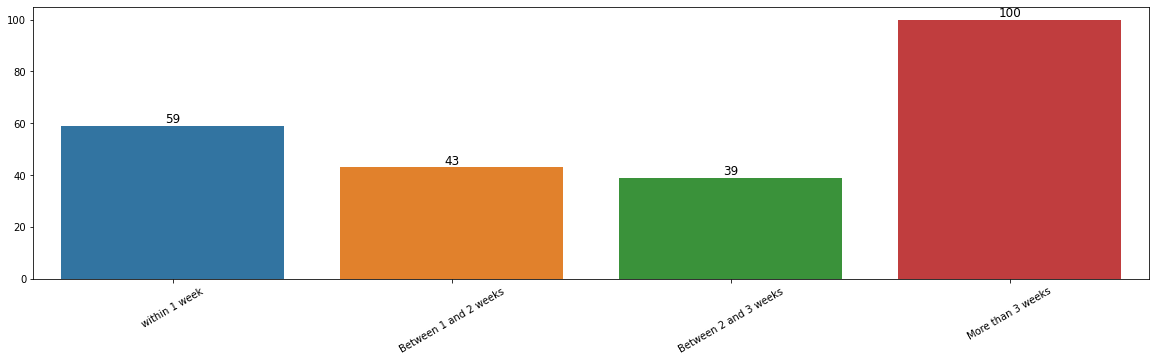

In [61]:
temp = pd.DataFrame(ios_junior_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# SKILLS

In [62]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in ios_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
skills_count_ios

,skill,count
0,ios,633
1,swift,469
2,unity,405
3,git,348
4,english,342
5,engineering,324
6,communication,311
7,testing,311
8,a b,309
9,objective c,218


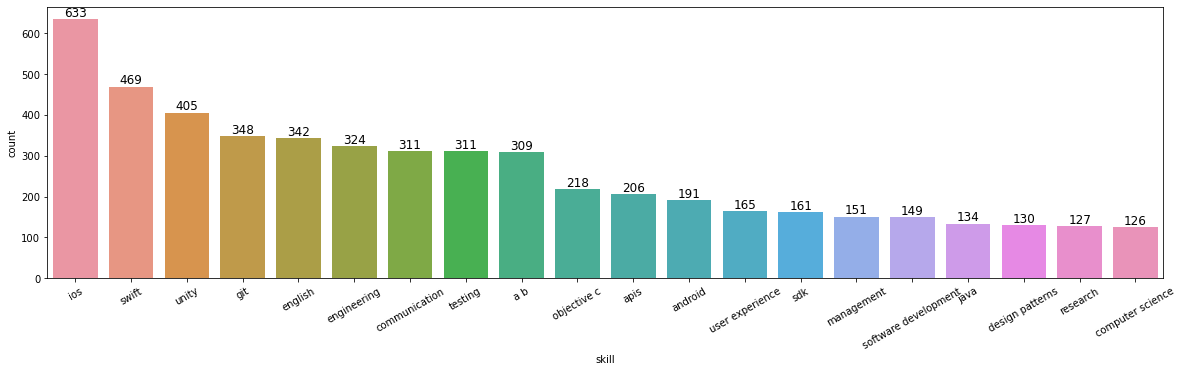

In [63]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

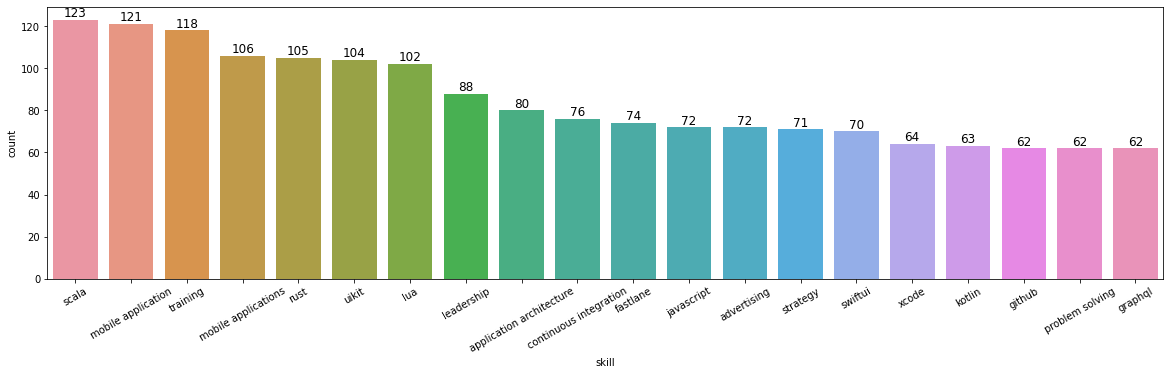

In [64]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.iloc[20:40])
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# JUNIOR LEVEL SKILLS 

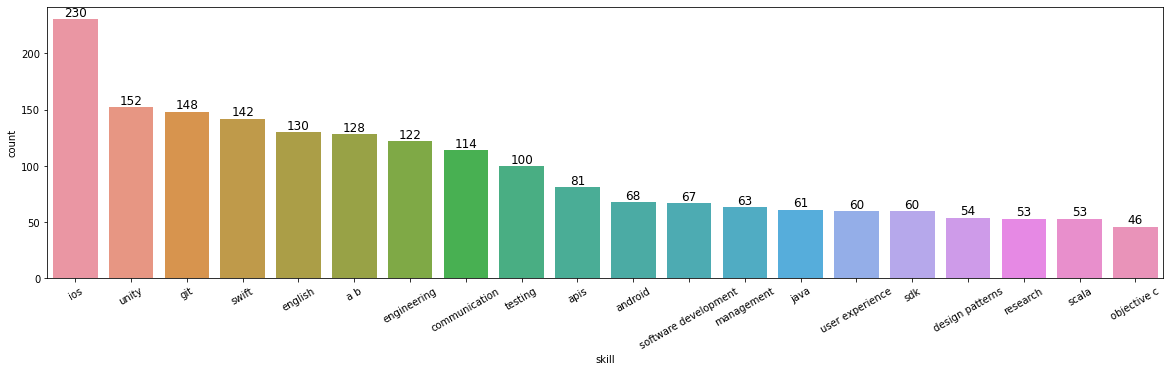

In [65]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in ios_junior_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies iOS

In [66]:
top_companies_ios = pd.DataFrame(ios_df['company_name'].value_counts()).reset_index()
top_companies_ios.columns =['company_name', 'number of postings']
top_companies_ios

,company_name,number of postings
0,zalando,74
1,sumup,26
2,picsart,24
3,delivery hero,20
4,amazon,19
5,mimi hearing technologies,19
6,join.com,12
7,mobile.de gmbh,12
8,cariad,11
9,gymondo,11


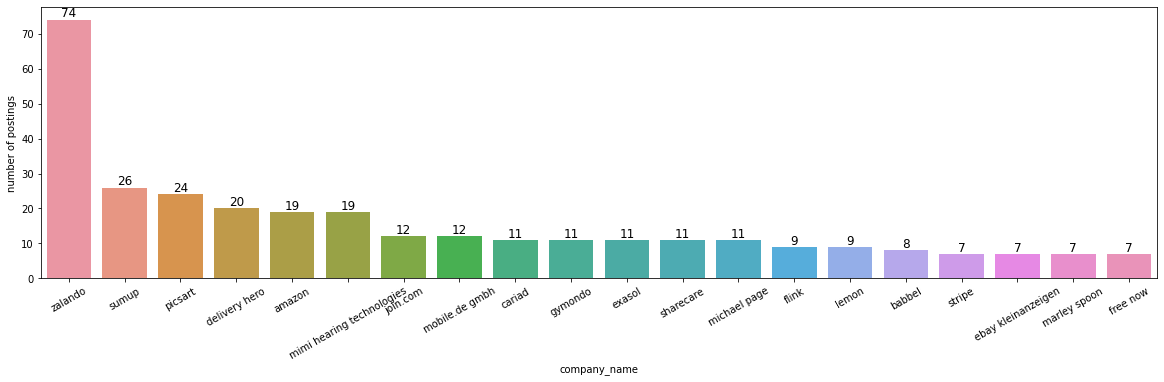

In [67]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# TOP IOS JOB COMPANIES FOR JUNIOR POSITIONS 

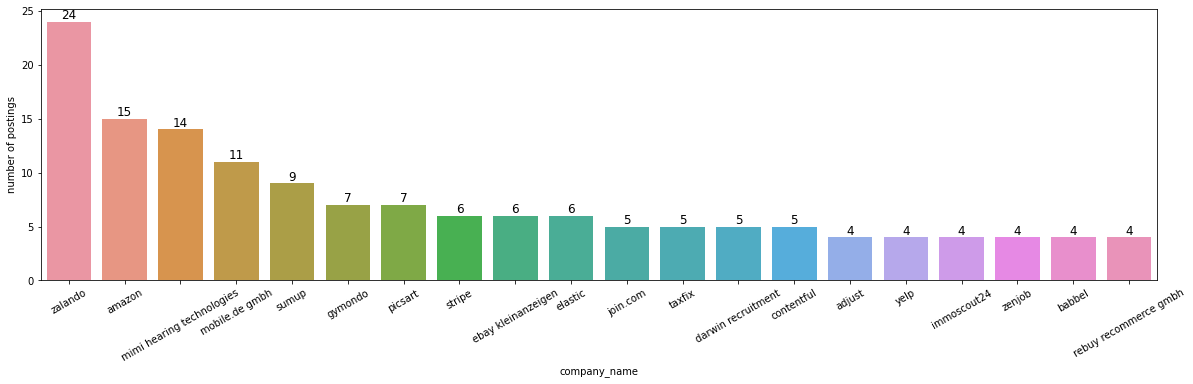

In [68]:
top_companies_ios = pd.DataFrame(ios_junior_df['company_name'].value_counts()).reset_index()
top_companies_ios.columns =['company_name', 'number of postings']
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Android Analysis

In [69]:
android_df = df[df['platform']=='android']
android_df.shape

(907, 18)

In [70]:
android_junior_df = df[(df['platform']=='android') & (df['seniority_segment_created']=='junior/entry level')]
android_junior_df.shape

(427, 18)

# ANDROID JOBS BY TIMEFRAME

In [71]:
temp = pd.DataFrame(android_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,384
1,within 1 week,296
2,Between 1 and 2 weeks,125
3,Between 2 and 3 weeks,102


In [72]:
a = temp['time_frames'][0]
b = temp['time_frames'][2]
c = temp['time_frames'][3]
d = temp['time_frames'][1]
x = [a,b, c, d]
a = temp['number of postings'][0]
b = temp['number of postings'][2]
c = temp['number of postings'][3]
d = temp['number of postings'][1]
y = [a,b,c,d]

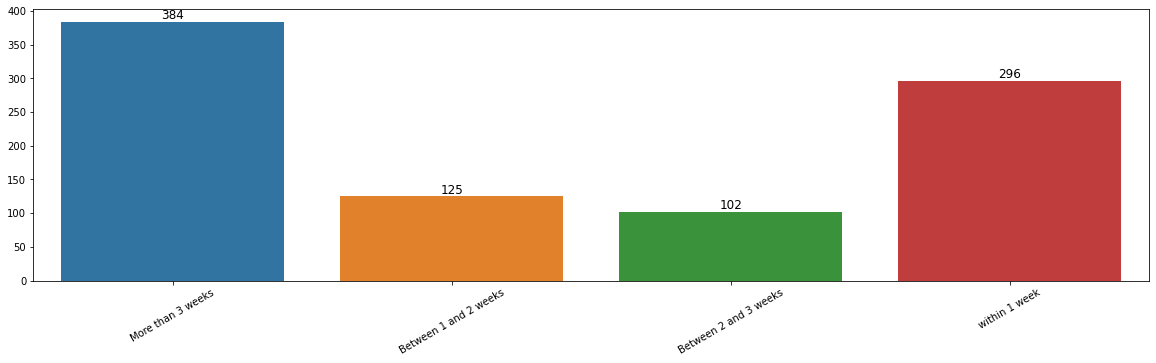

In [73]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# JUNIOR LEVEL ANDROID JOBS BY TIME FRAME

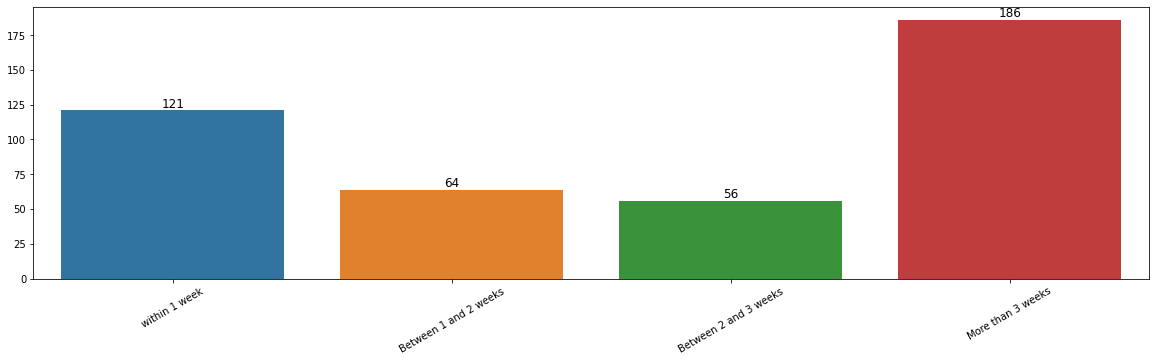

In [74]:
temp = pd.DataFrame(android_junior_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# ANDROID SKILLS 

In [75]:
skills_count_android = {}
counter = 0
for skill in skills:
    counter = 0
    for description in android_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_android[skill] = counter
skills_count_android = pd.DataFrame(dict(sorted(skills_count_android.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_android.columns = ['skill', 'count']
skills_count_android = skills_count_android[skills_count_android['count']>0]
skills_count_android.head(20)

,skill,count
0,kotlin,742
1,android,712
2,java,640
3,testing,510
4,unity,473
5,engineering,455
6,git,435
7,english,416
8,communication,390
9,a b,373


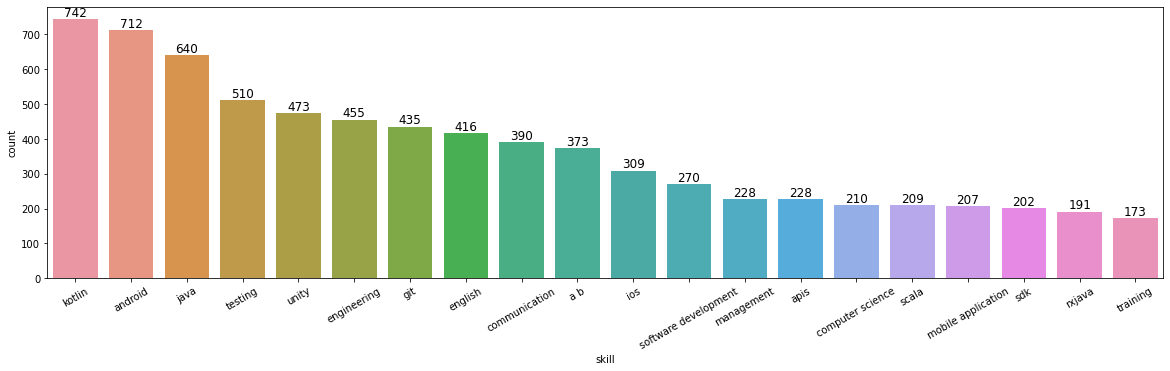

In [76]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# ANDROID SKILLS FOR JUNIOR POSITIONS 

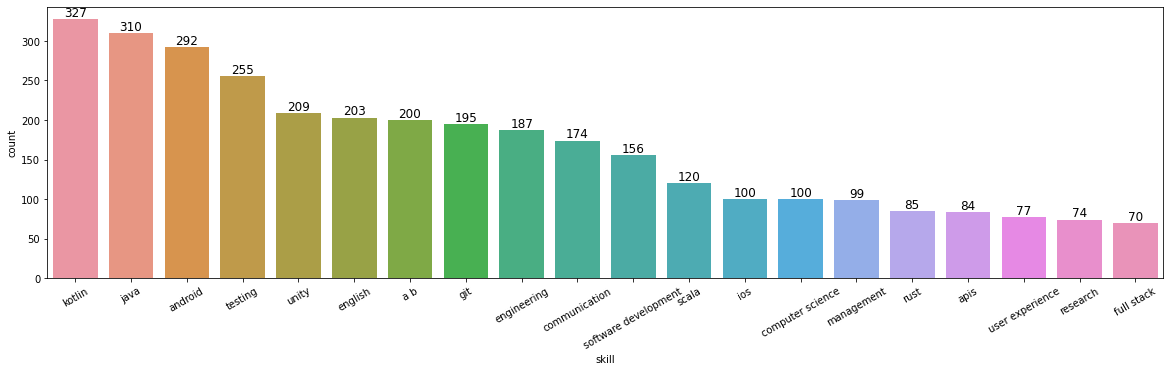

In [77]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in android_junior_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies Android

In [78]:
top_companies_android = pd.DataFrame(android_df['company_name'].value_counts()).reset_index()
top_companies_android.columns =['company_name', 'number of postings']
top_companies_android

,company_name,number of postings
0,zalando,103
1,amazon,77
2,delivery hero,33
3,client server,33
4,picsart,26
5,zattoo,25
6,n26,21
7,mobile.de gmbh,20
8,moyyn,20
9,tier mobility,19


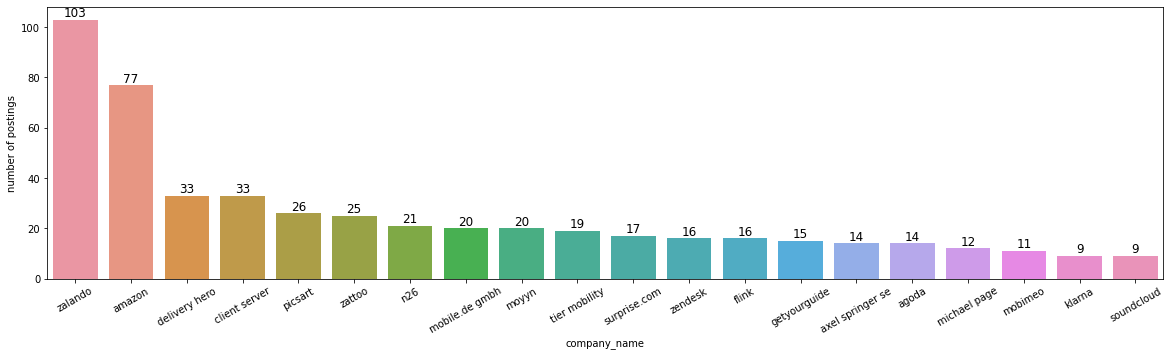

In [79]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# TOP COMPANIES ANDROID FOR JUNIOR POSITIONS 

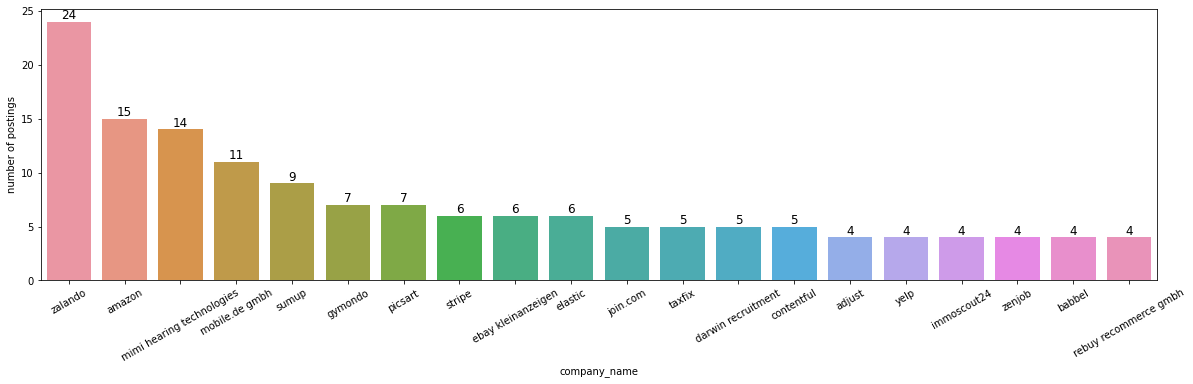

In [80]:
top_companies_android = pd.DataFrame(android_junior_df['company_name'].value_counts()).reset_index()
top_companies_android.columns =['company_name', 'number of postings']
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()